In [1]:
import os

import numpy as np

from synthacc.io.esgmd2 import read_cor, read_spc
from synthacc.recordings import Accelerogram
from synthacc.response import plot_response_spectra

In [2]:
root_folder = %pwd

In [3]:
fs = os.path.join(root_folder, 'data', 'response', '004676xa.cor')
dis, vel, acc = read_cor(fs)
acc = Accelerogram.from_seismogram(acc)

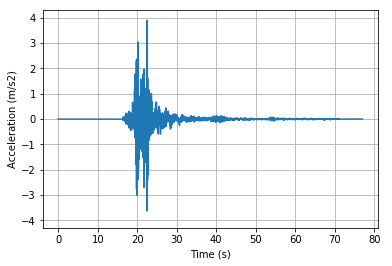

In [4]:
acc.plot()

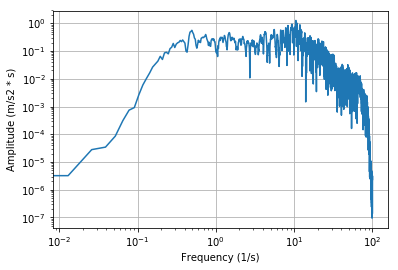

In [5]:
acc.fas.plot()

In [6]:
r1 = acc.get_response(period=0.01)
r2 = acc.get_response(period=0.10)
r3 = acc.get_response(period=1.00)
r4 = acc.get_response(period=2.00)

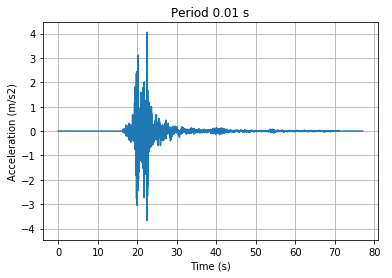

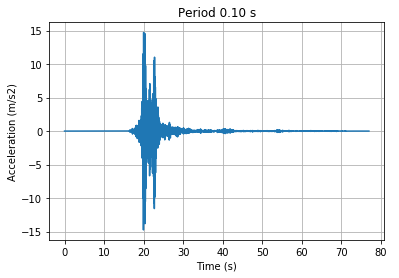

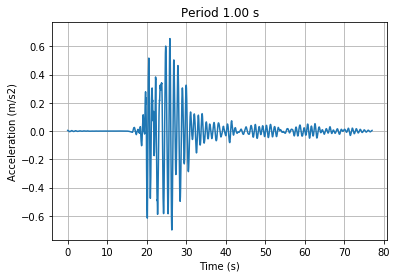

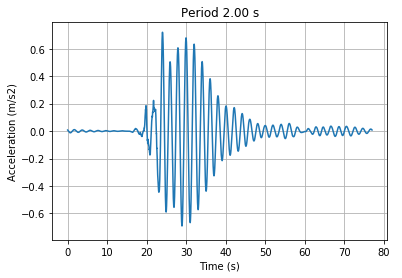

In [7]:
r1.plot(title='Period 0.01 s')
r2.plot(title='Period 0.10 s')
r3.plot(title='Period 1.00 s')
r4.plot(title='Period 2.00 s')

In [8]:
periods = np.logspace(-2, 1, 200)

cal_acc_rs = acc.get_response_spectrum(periods, gmt='acc')
cal_vel_rs = acc.get_response_spectrum(periods, gmt='vel')
cal_dis_rs = acc.get_response_spectrum(periods, gmt='dis')

In [9]:
tgt_dis_rs, tgt_vel_rs, tgt_acc_rs, tgt_pvel_rs = read_spc(os.path.join(root_folder, 'data', 'response', '004676xa.spc'))[2]

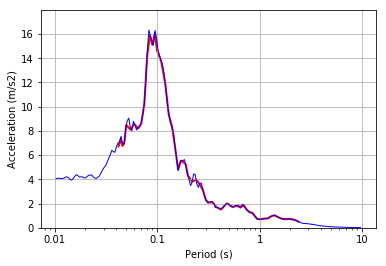

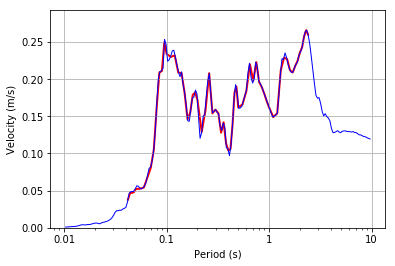

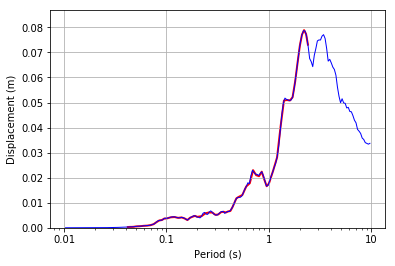

In [10]:
plot_response_spectra([tgt_acc_rs, cal_acc_rs], colors=['r', 'b'], widths=[2, 1])
plot_response_spectra([tgt_vel_rs, cal_vel_rs], colors=['r', 'b'], widths=[2, 1])
plot_response_spectra([tgt_dis_rs, cal_dis_rs], colors=['r', 'b'], widths=[2, 1])

In [11]:
## Time domain

In [12]:
from synthacc.response import NewmarkBetaRC, NigamJenningsRC

In [13]:
acc.unit

'm/s2'

In [14]:
nb_calc, nj_calc = NewmarkBetaRC(), NigamJenningsRC()

nb_rs = nb_calc(acc.time_delta, acc.amplitudes, np.array([1/2]))
nj_rs = nj_calc(acc.time_delta, acc.amplitudes, np.array([1/2]))

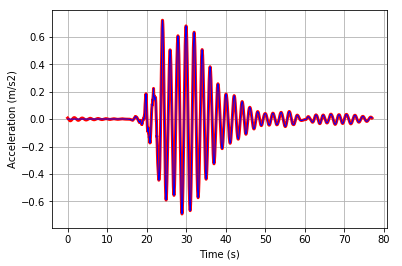

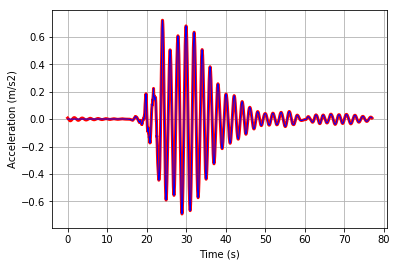

In [15]:
from synthacc.recordings import Seismogram, plot_seismograms

nb_s = Seismogram(acc.time_delta, nb_rs[2][:,0], unit='m/s2')
nj_s = Seismogram(acc.time_delta, nj_rs[2][:,0], unit='m/s2')

plot_seismograms([[r4, nb_s]], colors=[['r', 'b']], widths=[[3, 1]])
plot_seismograms([[r4, nj_s]], colors=[['r', 'b']], widths=[[3, 1]])

In [16]:
nb_dis_rss = nb_calc.get_response_spectrum(acc, periods, damping=0.05, gmt='dis', pgm_frequency=100)
nj_dis_rss = nj_calc.get_response_spectrum(acc, periods, damping=0.05, gmt='dis', pgm_frequency=100)

nb_vel_rss = nb_calc.get_response_spectrum(acc, periods, damping=0.05, gmt='vel', pgm_frequency=100)
nj_vel_rss = nj_calc.get_response_spectrum(acc, periods, damping=0.05, gmt='vel', pgm_frequency=100)

nb_acc_rss = nb_calc.get_response_spectrum(acc, periods, damping=0.05, gmt='acc', pgm_frequency=100)
nj_acc_rss = nj_calc.get_response_spectrum(acc, periods, damping=0.05, gmt='acc', pgm_frequency=100)

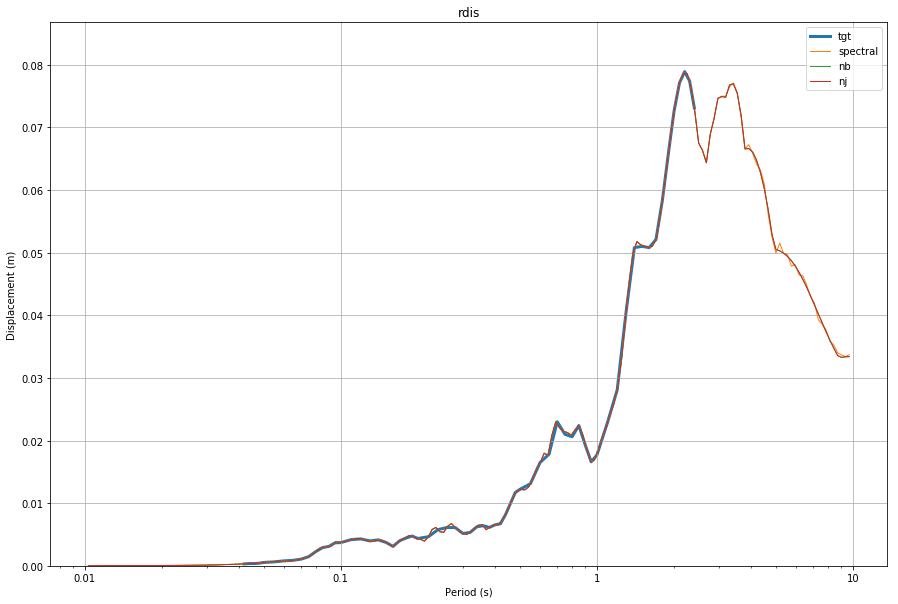

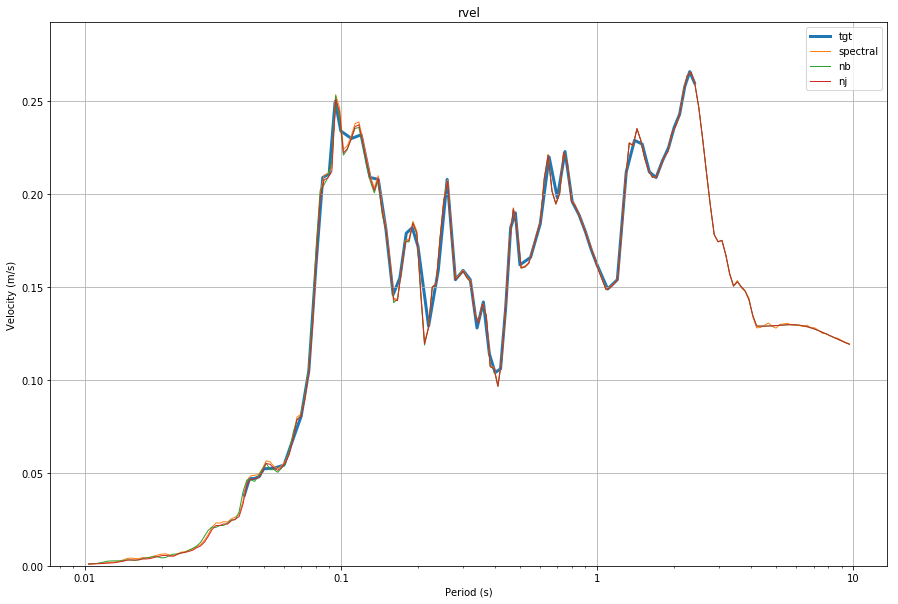

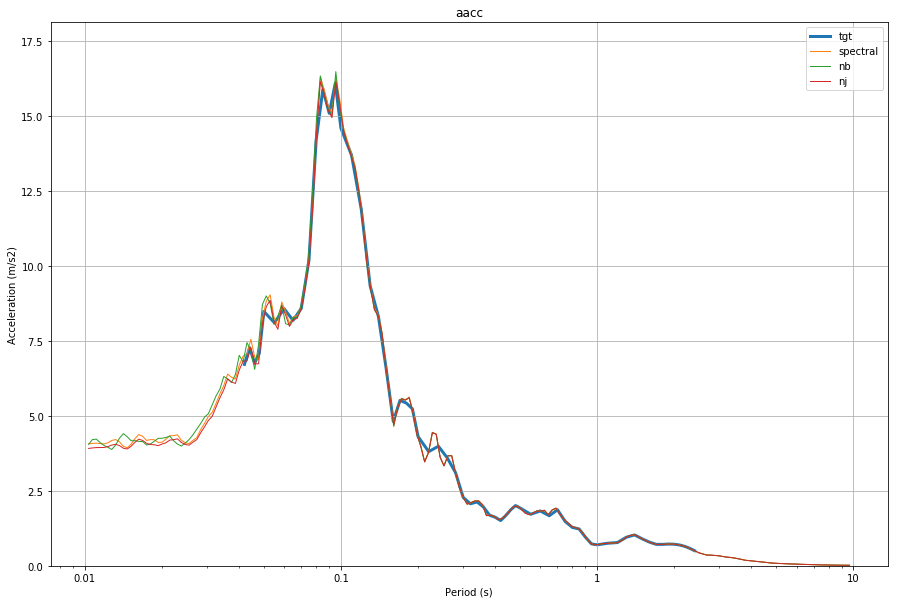

In [17]:
plot_response_spectra([tgt_dis_rs, cal_dis_rs, nb_dis_rss, nj_dis_rss], widths=[3, 1, 1, 1], labels=['tgt', 'spectral', 'nb', 'nj'], size=(15, 10), title='rdis')
plot_response_spectra([tgt_vel_rs, cal_vel_rs, nb_vel_rss, nj_vel_rss], widths=[3, 1, 1, 1], labels=['tgt', 'spectral', 'nb', 'nj'], size=(15, 10), title='rvel')
plot_response_spectra([tgt_acc_rs, cal_acc_rs, nb_acc_rss, nj_acc_rss], widths=[3, 1, 1, 1], labels=['tgt', 'spectral', 'nb', 'nj'], size=(15, 10), title='aacc')

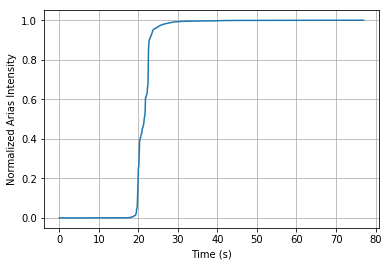

3.585 7.075


In [18]:
from synthacc.recordings import husid_plot


husid_plot([acc])

d1 = acc.get_arias_duration()
d2 = acc.get_strong_motion_duration()

print(d1, d2)

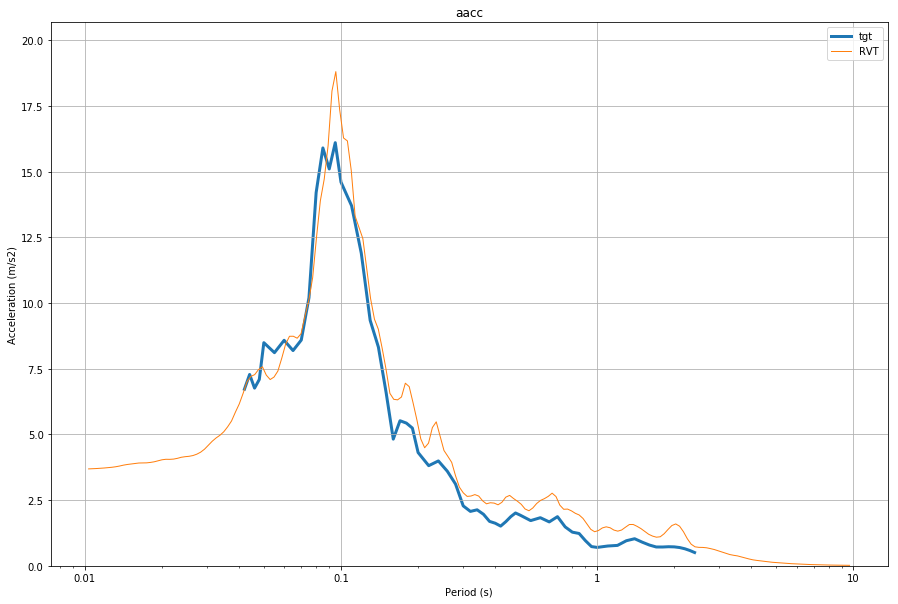

In [19]:
from synthacc.response import RVTCalculator


calc = RVTCalculator()

cal_acc_rs = calc.get_response_spectrum(acc.fas, periods, duration=d1, damping=0.05)

plot_response_spectra([tgt_acc_rs, cal_acc_rs], widths=[3, 1], labels=['tgt', 'RVT'], size=(15, 10), title='aacc')